In [1]:
from matplotlib import  pyplot as plt
import numpy as np
from imageio import imread
import pandas as pd
from time import time as timer

import tensorflow as tf

%matplotlib inline
from matplotlib import animation
from matplotlib import cm
from IPython.display import HTML

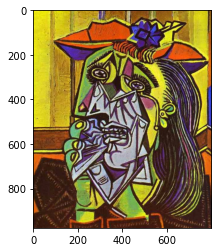

(977, 800, 3)

In [2]:
image_big = imread('kub.JPG')
image_big = image_big[...,0:3]/255
plt.imshow(image_big)
plt.show()
image_big.shape

In [8]:
#downscale it
def subsample(im, factor):
  h, w = im.shape[:2]
  h = int(h/factor) * factor
  w = int(w/factor) * factor
  ims = [im[j:h:factor, i:w:factor] for j in range(factor) for i in range(factor)]
  return np.mean(ims, axis=0)

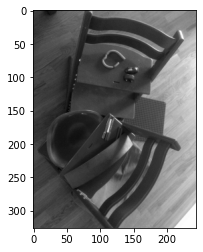

In [7]:
#make it grey
image = subsample(image_big, 10)
image = image.mean(axis=2, keepdims=True)
plt.imshow(image[...,0], cmap='gray')
plt.show()

In [9]:
#we try to regress the brightness from the picture
h, w, c = image.shape

In [10]:
X0 = np.meshgrid(np.linspace(0, 1, w), np.linspace(0, 1, h))
X = np.stack(X0, axis=-1).reshape((-1, 2))

Y = image.reshape((-1, c))
X.shape, Y.shape

((79544, 2), (79544, 1))

In [11]:
#create the model, sigmoid-activation, adam-optimizer
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(c, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [12]:
# train for 500 epochs, minibatchsize
hist = model.fit(X, Y, epochs=500, batch_size=2048)

Epoch 1/500
39/39 [==============================] - 0s 627us/step - loss: 0.1335 - mse: 0.0232
Epoch 2/500
39/39 [==============================] - 0s 639us/step - loss: 0.1269 - mse: 0.0211
Epoch 3/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.0198
Epoch 4/500
39/39 [==============================] - 0s 665us/step - loss: 0.1176 - mse: 0.0190
Epoch 5/500
39/39 [==============================] - 0s 567us/step - loss: 0.1149 - mse: 0.0187
Epoch 6/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1131 - mse: 0.0186
Epoch 7/500
39/39 [==============================] - 0s 843us/step - loss: 0.1120 - mse: 0.0186
Epoch 8/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1111 - mse: 0.0187
Epoch 9/500
39/39 [==============================] - 0s 588us/step - loss: 0.1105 - mse: 0.0186
Epoch 10/500
39/39 [==============================] - 0s 972us/step - loss: 0.1100 - mse: 0.0186
Epoch 11/500
39/39 [=========================

39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 170/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 171/500
39/39 [==============================] - 0s 825us/step - loss: 0.1028 - mse: 0.0144
Epoch 172/500
39/39 [==============================] - 0s 742us/step - loss: 0.1028 - mse: 0.0144
Epoch 173/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 174/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 175/500
39/39 [==============================] - 0s 721us/step - loss: 0.1028 - mse: 0.0144
Epoch 176/500
39/39 [==============================] - 0s 690us/step - loss: 0.1028 - mse: 0.0144
Epoch 177/500
39/39 [==============================] - 0s 2ms/step - loss: 0.1028 - mse: 0.0144
Epoch 178/500
39/39 [==============================] - 0s 895us/step - loss: 0.1028 - mse: 0.0144
Epoch 179/500
39/39 [=======================

39/39 [==============================] - 0s 767us/step - loss: 0.1028 - mse: 0.0144
Epoch 338/500
39/39 [==============================] - 0s 966us/step - loss: 0.1028 - mse: 0.0144
Epoch 339/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 340/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 341/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 342/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 343/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 344/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 345/500
39/39 [==============================] - 0s 1ms/step - loss: 0.1028 - mse: 0.0144
Epoch 346/500
39/39 [==============================] - 0s 837us/step - loss: 0.1028 - mse: 0.0144
Epoch 347/500
39/39 [===========================

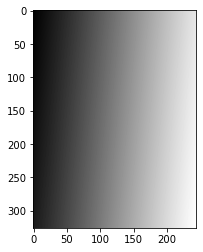

In [13]:
# we can predict the intensity of our piture
Y_p = model.predict(X)
Y_p = Y_p.reshape((h,w,c))
im = plt.imshow(Y_p[...,0], cmap='gray')
plt.show()

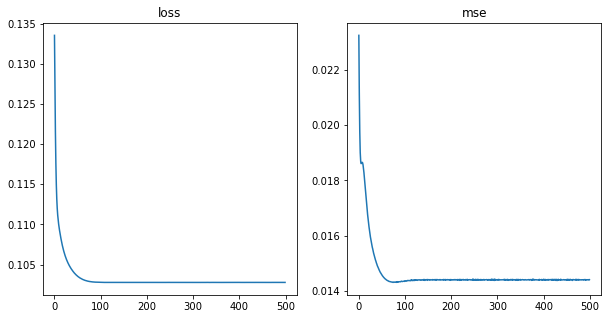

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].set_title('loss')
axs[1].plot(hist.epoch, hist.history['mse'])
axs[1].set_title('mse')
plt.show()

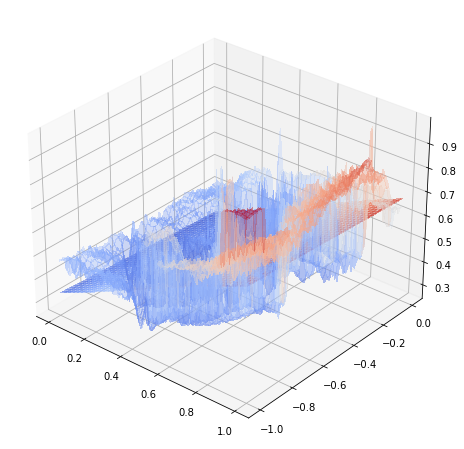

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.view_init(elev=30., azim=-50)  # azim=-50, elev=30

x = X[:,0].reshape((h,w))
y = X[:,1].reshape((h,w))
z = Y.reshape((h,w))
zp = Y_p.reshape((h,w))

ds = 2
x = subsample(x, ds)
y =-subsample(y, ds)
z = subsample(z, ds)
zp = subsample(zp, ds)

surf = ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.3)
surf = ax.plot_surface(x,y,zp, cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.5)
plt.show()

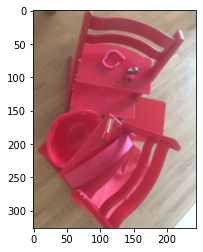

In [18]:
image = subsample(image_big, 10)
plt.imshow(image)
plt.show()

In [19]:
h, w, c = image.shape
X = np.meshgrid(np.linspace(0, 1, w), np.linspace(0, 1, h))
X = np.stack(X, axis=-1).reshape((-1, 2))

Y = image.reshape((-1, c))
X.shape, Y.shape

((79544, 2), (79544, 3))

In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2,)),
  tf.keras.layers.Dense(c, activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='mae',
              metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


total number of epochs trained:2048
epoch 0
epoch 200
epoch 400
epoch 600
epoch 800
epoch 1000
epoch 1200
epoch 1400
epoch 1600
epoch 1800
epoch 2000


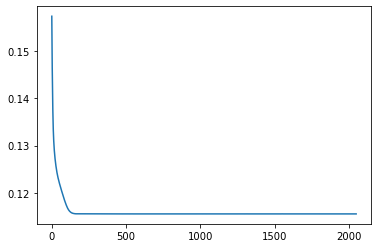

In [21]:
ims = []
loss_hist = []
n_ep_pow = 11
save_epochs = [0]+[2**i for i in range(n_ep_pow)]
n_ep_tot = save_epochs[-1]

ne = 2
print(f'total number of epochs trained:{n_ep_tot*ne}')

for i in range(n_ep_tot+1):
  if i % 100 == 0:
    print(f'epoch {i*ne}', end='\n')
  hist = model.fit(X, Y, epochs=ne, batch_size=1*2048, verbose=0)
  loss_hist += hist.history['loss']

  if i in save_epochs:
    Y_p = model.predict(X)
    Y_p = Y_p.reshape((h, w, c))
    ims.append(Y_p)

plt.plot(loss_hist)
plt.show()

In [22]:
%%capture

fig = plt.figure()
im = plt.imshow(ims[0])

def animate(i):
    img = ims[i]
    im.set_data(img)
    return im

ani = animation.FuncAnimation(fig, animate, frames=len(ims))

In [23]:
ani